# good resource for food price prediction models: https://www.ers.usda.gov/webdocs/publications/47309/51572_tb1883.pdf?v=42079

# Current Conclusion: Adding Customer Product Index as another input for prediction of Actuals typically overshoots in predicting actuals (higher) whereas the typical predictions inside the internal dataset tends to undershoot. The typical predictions also tend to undershoot with a lower absolute value meaning these predictions are actually closer than the current model utilizing Customer Product Index as another feature. 

# Hypothesis: More Pertinent Economic features such as Customer Product Index Food and Customer Product Index Percent Changes over month will improve the validation accuracy if accompanied with a slower learning rate for the model to adapt to the nuiansces within the data

# Trying to do Food Consumer Prodcut Index

In [53]:
import pandas as pd
PLN=pd.read_csv("PLN_TO_ITM_WK (KNA_COMRCL)_PLN_TO_ITM_WK.csv")
PLN

,All In Flg,Alt Segment,BU,Cal Wk,Can Catg,Catg,Curr,Fisc Yr,Lvl A,Lvl B,...,Pln Nsv Prxy Usd,Pln Sc Prxy Usd,Pln Ship Cs,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs,Pln Ship Usd,Sugstd Base Vol Sas,Sugstd Shlf Prc Sas,Totl Pln Kmf Cost Of Prod Usd
0,F,PWS,K1,202301,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,F,PWS,K1,202302,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,F,PWS,K1,202303,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,F,PWS,K1,202304,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,F,PWS,K1,202305,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325643,F,CONVENIENCE,Specialty,202017,NPF,TOASTER PASTRIES,CAD,2020,CANADA,CANADA OUT OF HOME,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325644,F,CONVENIENCE,Specialty,202018,NPF,TOASTER PASTRIES,CAD,2020,CANADA,CANADA OUT OF HOME,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325645,F,CONVENIENCE,Specialty,202019,NPF,TOASTER PASTRIES,CAD,2020,CANADA,CANADA OUT OF HOME,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325646,F,CONVENIENCE,Specialty,202020,NPF,TOASTER PASTRIES,CAD,2020,CANADA,CANADA OUT OF HOME,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
import pandas as pd
PLN=pd.read_csv("PLN_TO_ITM_WK (KNA_COMRCL)_PLN_TO_ITM_WK.csv")
PLN

pop_tarts = PLN[PLN['Prod Hier Brand Desc'] == 'Pop-Tarts'].copy()
pop_tarts

,All In Flg,Alt Segment,BU,Cal Wk,Can Catg,Catg,Curr,Fisc Yr,Lvl A,Lvl B,...,Pln Nsv Prxy Usd,Pln Sc Prxy Usd,Pln Ship Cs,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs,Pln Ship Usd,Sugstd Base Vol Sas,Sugstd Shlf Prc Sas,Totl Pln Kmf Cost Of Prod Usd
0,F,PWS,K1,202301,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,F,PWS,K1,202302,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,F,PWS,K1,202303,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,F,PWS,K1,202304,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,F,PWS,K1,202305,NPF,TOASTER PASTRIES,USD,2023,US RETAIL CHANNELS,DRUG/DISCOUNT/TELESALES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325643,F,CONVENIENCE,Specialty,202017,NPF,TOASTER PASTRIES,CAD,2020,CANADA,CANADA OUT OF HOME,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325644,F,CONVENIENCE,Specialty,202018,NPF,TOASTER PASTRIES,CAD,2020,CANADA,CANADA OUT OF HOME,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325645,F,CONVENIENCE,Specialty,202019,NPF,TOASTER PASTRIES,CAD,2020,CANADA,CANADA OUT OF HOME,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325646,F,CONVENIENCE,Specialty,202020,NPF,TOASTER PASTRIES,CAD,2020,CANADA,CANADA OUT OF HOME,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# Values to check
values_to_check = {'2023&6', '2023&7', '2023&8', '2023&9'}

# Check if any of the values are present in pop_tarts
result = pop_tarts['Yr & Wk'].isin(values_to_check).any()

# Print the result
print(result)

True


In [56]:
pop_tarts=pop_tarts[["Yr & Wk", "Pln Ship Usd", "Actl Ship Usd","Cal Wk", 'Pln Base Cs', 'Pln Base Lbs', 'Pln Base Rtn Usd', 'Pln Base Units', 'Pln Base Usd',
    'Pln Cons Lbs', 'Pln Cons Rtn Usd', 'Pln Cons Units', 'Pln Cons Usd', 'Pln Inc Usd',
    'Pln Incr Cs', 'Pln Incr Lbs', 'Pln Incr Rtn Usd', 'Pln Incr Ship Cs', 'Pln Incr Ship Kgs',
    'Pln Incr Ship Lbs', 'Pln Incr Ship Units', 'Pln Incr Ship Usd', 'Pln Incr Units',
    'Pln Kmf', 'Pln Nsv Prxy Usd', 'Pln Sc Prxy Usd', 'Pln Ship Cs', 'Pln Ship Ea',
    'Pln Ship Kg', 'Pln Ship Lbs']]
pop_tarts

,Yr & Wk,Pln Ship Usd,Actl Ship Usd,Cal Wk,Pln Base Cs,Pln Base Lbs,Pln Base Rtn Usd,Pln Base Units,Pln Base Usd,Pln Cons Lbs,...,Pln Incr Ship Units,Pln Incr Ship Usd,Pln Incr Units,Pln Kmf,Pln Nsv Prxy Usd,Pln Sc Prxy Usd,Pln Ship Cs,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs
0,2023&1,0.0,0.00,202301,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023&2,0.0,0.00,202302,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023&3,0.0,0.00,202303,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023&4,0.0,0.00,202304,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023&5,0.0,0.00,202305,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325643,2020&17,0.0,1252.80,202017,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325644,2020&18,0.0,1252.80,202018,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325645,2020&19,0.0,99.72,202019,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325646,2020&20,0.0,626.40,202020,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
pop_tarts_filtered = pop_tarts[(pop_tarts['Pln Ship Usd'] != 0) | (pop_tarts['Actl Ship Usd'] != 0)].copy()
pop_tarts_filtered

,Yr & Wk,Pln Ship Usd,Actl Ship Usd,Cal Wk,Pln Base Cs,Pln Base Lbs,Pln Base Rtn Usd,Pln Base Units,Pln Base Usd,Pln Cons Lbs,...,Pln Incr Ship Units,Pln Incr Ship Usd,Pln Incr Units,Pln Kmf,Pln Nsv Prxy Usd,Pln Sc Prxy Usd,Pln Ship Cs,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs
8,2023&9,2336.16,0.00,202309,248.0,325.62,0.0,1488.0,2336.16,325.62,...,0.0,0.0,0.0,0.0,2336.16,1259.84,248.0,1488.0,147.81,325.62
9,2023&10,2455.20,0.00,202310,248.0,325.62,0.0,1488.0,2455.20,325.62,...,0.0,0.0,0.0,0.0,2455.20,1378.88,248.0,1488.0,147.81,325.62
10,2023&11,2455.20,0.00,202311,248.0,325.62,0.0,1488.0,2455.20,325.62,...,0.0,0.0,0.0,0.0,2455.20,1378.88,248.0,1488.0,147.81,325.62
11,2023&12,2455.20,0.00,202312,248.0,325.62,0.0,1488.0,2455.20,325.62,...,0.0,0.0,0.0,0.0,2455.20,1378.88,248.0,1488.0,147.81,325.62
12,2023&13,2455.20,0.00,202313,248.0,325.62,0.0,1488.0,2455.20,325.62,...,0.0,0.0,0.0,0.0,2455.20,1378.88,248.0,1488.0,147.81,325.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325643,2020&17,0.00,1252.80,202017,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
1325644,2020&18,0.00,1252.80,202018,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
1325645,2020&19,0.00,99.72,202019,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
1325646,2020&20,0.00,626.40,202020,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00


In [58]:
# Values to check
values_to_check = {'2023&6', '2023&7', '2023&8', '2023&9'}

# Check if any of the values are present in pop_tarts
result = pop_tarts_filtered['Yr & Wk'].isin(values_to_check).any()

# Print the result
print(result)

True


In [59]:
pop_tarts_filtered = pop_tarts_filtered[pop_tarts_filtered['Actl Ship Usd'] != 0.00].copy()
pop_tarts_filtered

,Yr & Wk,Pln Ship Usd,Actl Ship Usd,Cal Wk,Pln Base Cs,Pln Base Lbs,Pln Base Rtn Usd,Pln Base Units,Pln Base Usd,Pln Cons Lbs,...,Pln Incr Ship Units,Pln Incr Ship Usd,Pln Incr Units,Pln Kmf,Pln Nsv Prxy Usd,Pln Sc Prxy Usd,Pln Ship Cs,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs
13,2023&14,2049.3,2856.00,202314,207.0,271.79,0.0,1242.0,2049.3,271.79,...,0.0,0.0,0.0,205.15,1844.15,945.77,207.0,1242.0,123.37,271.79
14,2023&15,2049.3,8772.00,202315,207.0,271.79,0.0,1242.0,2049.3,271.79,...,0.0,0.0,0.0,205.13,1844.17,945.79,207.0,1242.0,123.37,271.79
17,2023&18,2049.3,1428.00,202318,207.0,271.79,0.0,1242.0,2049.3,271.79,...,0.0,0.0,0.0,205.13,1844.17,945.79,207.0,1242.0,123.37,271.79
18,2023&19,2049.3,2244.00,202319,207.0,271.79,0.0,1242.0,2049.3,271.79,...,0.0,0.0,0.0,205.12,1844.18,945.80,207.0,1242.0,123.37,271.79
19,2023&20,2049.3,408.00,202320,207.0,271.79,0.0,1242.0,2049.3,271.79,...,0.0,0.0,0.0,205.14,1844.16,945.78,207.0,1242.0,123.37,271.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325643,2020&17,0.0,1252.80,202017,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00
1325644,2020&18,0.0,1252.80,202018,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00
1325645,2020&19,0.0,99.72,202019,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00
1325646,2020&20,0.0,626.40,202020,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00


In [60]:
# Values to check
values_to_check = {'2023&6', '2023&7', '2023&8', '2023&9'}

# Check if any of the values are present in pop_tarts
result = pop_tarts_filtered['Yr & Wk'].isin(values_to_check).any()

# Print the result
print(result)

True


In [61]:
pop_tarts_filtered = pop_tarts_filtered[pop_tarts_filtered['Pln Ship Usd'] != 0.00].copy()
pop_tarts_filtered

,Yr & Wk,Pln Ship Usd,Actl Ship Usd,Cal Wk,Pln Base Cs,Pln Base Lbs,Pln Base Rtn Usd,Pln Base Units,Pln Base Usd,Pln Cons Lbs,...,Pln Incr Ship Units,Pln Incr Ship Usd,Pln Incr Units,Pln Kmf,Pln Nsv Prxy Usd,Pln Sc Prxy Usd,Pln Ship Cs,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs
13,2023&14,2049.30,2856.00,202314,207.00,271.79,0.0,1242.00,2049.30,271.79,...,0.0,0.00,0.0,205.15,1844.15,945.77,207.00,1242.00,123.37,271.79
14,2023&15,2049.30,8772.00,202315,207.00,271.79,0.0,1242.00,2049.30,271.79,...,0.0,0.00,0.0,205.13,1844.17,945.79,207.00,1242.00,123.37,271.79
17,2023&18,2049.30,1428.00,202318,207.00,271.79,0.0,1242.00,2049.30,271.79,...,0.0,0.00,0.0,205.13,1844.17,945.79,207.00,1242.00,123.37,271.79
18,2023&19,2049.30,2244.00,202319,207.00,271.79,0.0,1242.00,2049.30,271.79,...,0.0,0.00,0.0,205.12,1844.18,945.80,207.00,1242.00,123.37,271.79
19,2023&20,2049.30,408.00,202320,207.00,271.79,0.0,1242.00,2049.30,271.79,...,0.0,0.00,0.0,205.14,1844.16,945.78,207.00,1242.00,123.37,271.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325410,2023&41,676.44,95.84,202341,12.12,85.48,0.0,96.93,580.60,85.48,...,16.0,95.84,0.0,120.75,555.69,208.01,14.12,112.93,45.17,99.59
1325412,2023&43,293.03,431.28,202343,12.12,85.47,0.0,96.92,580.55,85.47,...,-48.0,-287.52,0.0,51.75,241.28,90.67,6.12,48.92,19.57,43.14
1325413,2023&44,676.44,47.92,202344,12.12,85.48,0.0,96.93,580.60,85.48,...,16.0,95.84,0.0,120.75,555.69,208.01,14.12,112.93,45.17,99.59
1325414,2023&45,676.39,47.92,202345,12.12,85.47,0.0,96.92,580.55,85.47,...,16.0,95.84,0.0,120.75,555.64,207.99,14.12,112.92,45.17,99.58


In [62]:
# Values to check
values_to_check = {'2023&6', '2023&7', '2023&8', '2023&9'}

# Check if any of the values are present in pop_tarts
result = pop_tarts_filtered['Yr & Wk'].isin(values_to_check).any()

# Print the result
print(result)

True


In [63]:
is_zero_in_pln = (pop_tarts_filtered['Pln Ship Usd'] == 0).any()
is_zero_in_actl = (pop_tarts_filtered['Actl Ship Usd'] == 0).any()

# Display the results
print(f"Any numeric value equal to 0 in 'Pln Ship Usd': {is_zero_in_pln}")
print(f"Any numeric value equal to 0 in 'Actl Ship Usd': {is_zero_in_actl}")

Any numeric value equal to 0 in 'Pln Ship Usd': False
Any numeric value equal to 0 in 'Actl Ship Usd': False


In [64]:
import pandas as pd
# Assuming pop_tarts_filtered is your existing DataFrame

# Filter rows where 'Pln Ship Usd' is not equal to 0.00

# Convert 'Cal Wk' column to integers
pop_tarts_filtered['Cal Wk'] = pop_tarts_filtered['Cal Wk'].astype(int)

# Sort the DataFrame by 'Cal Wk' in ascending order
pop_tarts_filtered = pop_tarts_filtered.sort_values(by='Cal Wk')

# Display the resulting DataFrame
pop_tarts_filtered

,Yr & Wk,Pln Ship Usd,Actl Ship Usd,Cal Wk,Pln Base Cs,Pln Base Lbs,Pln Base Rtn Usd,Pln Base Units,Pln Base Usd,Pln Cons Lbs,...,Pln Incr Ship Units,Pln Incr Ship Usd,Pln Incr Units,Pln Kmf,Pln Nsv Prxy Usd,Pln Sc Prxy Usd,Pln Ship Cs,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs
588205,2020&1,1431.00,2160.00,202001,18.00,182.86,432.00,216.00,486.00,235.47,...,420.00,945.00,62.14,425.88,1005.12,572.67,53.00,636.00,244.23,538.43
524656,2020&1,5941.80,2073.60,202001,171.93,2619.82,6168.74,2063.12,5941.80,2619.82,...,0.00,0.00,0.00,245.64,5696.16,4057.70,171.93,2063.12,1188.36,2619.82
731785,2020&1,970.62,540.00,202001,35.95,365.21,1289.85,431.39,970.62,365.21,...,0.00,0.00,0.00,329.37,641.25,404.35,35.95,431.39,165.65,365.21
731524,2020&1,1941.11,1080.00,202001,71.89,730.36,2579.52,862.72,1941.11,730.36,...,0.00,0.00,0.00,329.39,1611.72,1029.39,71.89,862.72,331.28,730.36
730785,2020&1,447.10,518.40,202001,12.94,197.13,464.18,155.24,447.10,197.13,...,0.00,0.00,0.00,329.40,117.70,-79.98,12.94,155.24,89.42,197.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15748,2023&47,5438.66,22320.00,202347,337.71,3430.76,18195.60,4052.47,11914.27,7049.96,...,-2202.59,-6475.61,4275.07,205.69,5232.97,4119.95,154.16,1849.88,710.35,1566.08
1108783,2023&47,13903.18,4939.20,202347,170.08,1727.85,7939.38,2040.97,6000.46,1727.85,...,2688.00,7902.72,0.00,1556.99,12346.19,8992.56,394.08,4728.97,1815.94,4003.47
199285,2023&47,15876.00,2822.40,202347,450.00,4571.55,15390.00,5400.00,15876.00,4571.55,...,0.00,0.00,0.00,3564.00,12312.00,8923.50,450.00,5400.00,2073.60,4571.55
629317,2023&47,28799.86,13824.00,202347,625.00,9523.70,32924.84,7499.96,28799.86,9523.70,...,0.00,0.00,0.00,2699.99,26099.87,17031.16,625.00,7499.96,4319.98,9523.70


In [65]:
# Values to check
values_to_check = {'2023&6', '2023&7', '2023&8', '2023&9'}

# Check if any of the values are present in pop_tarts
result = pop_tarts_filtered['Yr & Wk'].isin(values_to_check).any()

# Print the result
print(result)

True


In [66]:
import pandas as pd
food_changes=pd.read_csv("food changes.csv")
food_changes = food_changes.iloc[:, 1:]
food_changes = food_changes.rename(columns={'year': 'Year', 'Period': 'Month'})
food_changes['Month'] = food_changes['Month'].str.replace('M', '').astype(int)

In [67]:
food_changes

,Year,Month,Label,Value,1-Month % Change,3-Month % Change,12-Month % Change
0,2000,1,2000 Jan,166.100,0.4,0.6,1.5
1,2000,2,2000 Feb,166.300,0.1,0.7,1.8
2,2000,3,2000 Mar,166.500,0.1,0.7,2.0
3,2000,4,2000 Apr,166.600,0.1,0.3,2.0
4,2000,5,2000 May,167.300,0.4,0.6,2.2
...,...,...,...,...,...,...,...
284,2023,9,2023 Sep,324.704,0.2,0.7,3.7
285,2023,10,2023 Oct,325.731,0.3,0.7,3.3
286,2023,11,2023 Nov,325.172,-0.2,0.3,2.9
287,2023,12,2023 Dec,325.409,0.1,0.2,2.7


In [68]:
import pandas as pd

food_changes['Date'] = pd.to_datetime(food_changes[['Year', 'Month']].assign(DAY=1))

# Calculate the week of the year based on the Date
food_changes['Yr & Wk'] = food_changes['Date'].dt.strftime('%Y&%U')

# Display the updated DataFrame
food_changes

,Year,Month,Label,Value,1-Month % Change,3-Month % Change,12-Month % Change,Date,Yr & Wk
0,2000,1,2000 Jan,166.100,0.4,0.6,1.5,2000-01-01,2000&00
1,2000,2,2000 Feb,166.300,0.1,0.7,1.8,2000-02-01,2000&05
2,2000,3,2000 Mar,166.500,0.1,0.7,2.0,2000-03-01,2000&09
3,2000,4,2000 Apr,166.600,0.1,0.3,2.0,2000-04-01,2000&13
4,2000,5,2000 May,167.300,0.4,0.6,2.2,2000-05-01,2000&18
...,...,...,...,...,...,...,...,...,...
284,2023,9,2023 Sep,324.704,0.2,0.7,3.7,2023-09-01,2023&35
285,2023,10,2023 Oct,325.731,0.3,0.7,3.3,2023-10-01,2023&40
286,2023,11,2023 Nov,325.172,-0.2,0.3,2.9,2023-11-01,2023&44
287,2023,12,2023 Dec,325.409,0.1,0.2,2.7,2023-12-01,2023&48


In [69]:
# Values to check
values_to_check = {'2023&6', '2023&7', '2023&8', '2023&9'}

# Check if any of the values are present in pop_tarts
result = food_changes['Yr & Wk'].isin(values_to_check).any()

# Print the result
print(result)

False


In [70]:
import pandas as pd

# Assuming your DataFrame is named food_changes
# If not, replace "food_changes" with the actual name of your DataFrame

# Calculate the date based on Year and Month
food_changes['Date'] = pd.to_datetime(food_changes[['Year', 'Month']].assign(DAY=1))

# Set the Date column as the index
food_changes.set_index('Date', inplace=True)

# Resample the DataFrame to include all weeks and forward fill the values
resampled_df = food_changes.resample('W-Mon').ffill()

# Reset the index and create the Yr & Wk column
resampled_df.reset_index(inplace=True)
resampled_df['Yr & Wk'] = resampled_df['Date'].dt.strftime('%Y&%U')

# Display the updated DataFrame
resampled_df.head(25)

,Date,Year,Month,Label,Value,1-Month % Change,3-Month % Change,12-Month % Change,Yr & Wk
0,2000-01-03,2000,1,2000 Jan,166.1,0.4,0.6,1.5,2000&01
1,2000-01-10,2000,1,2000 Jan,166.1,0.4,0.6,1.5,2000&02
2,2000-01-17,2000,1,2000 Jan,166.1,0.4,0.6,1.5,2000&03
3,2000-01-24,2000,1,2000 Jan,166.1,0.4,0.6,1.5,2000&04
4,2000-01-31,2000,1,2000 Jan,166.1,0.4,0.6,1.5,2000&05
5,2000-02-07,2000,2,2000 Feb,166.3,0.1,0.7,1.8,2000&06
6,2000-02-14,2000,2,2000 Feb,166.3,0.1,0.7,1.8,2000&07
7,2000-02-21,2000,2,2000 Feb,166.3,0.1,0.7,1.8,2000&08
8,2000-02-28,2000,2,2000 Feb,166.3,0.1,0.7,1.8,2000&09
9,2000-03-06,2000,3,2000 Mar,166.5,0.1,0.7,2.0,2000&10


In [71]:
print(resampled_df.isnull().sum())

Date                 0
Year                 0
Month                0
Label                0
Value                0
1-Month % Change     0
3-Month % Change     0
12-Month % Change    0
Yr & Wk              0
dtype: int64


In [72]:
# Replace 'your_column' with the actual column name, and 'your_value' with the specific value
desired_value = '2023&05'

# Filter the DataFrame based on the condition
filtered_row = resampled_df[resampled_df['Yr & Wk'] == desired_value]

# Display the result as a DataFrame
print(f"Rows where 'your_column' is equal to '{desired_value}':")
print(pd.DataFrame(filtered_row))


Rows where 'your_column' is equal to '2023&05':
           Date  Year  Month     Label    Value  1-Month % Change  \
1204 2023-01-30  2023      1  2023 Jan  319.136               0.7   

      3-Month % Change  12-Month % Change  Yr & Wk  
1204               1.2               10.1  2023&05  


In [73]:
# Values to check
'2023&06', '2023&07', '2023&08', '2023&09'
values_to_check = {'2023&06', '2023&07', '2023&08', '2023&09'}

# Check if any of the values are present in pop_tarts
result = resampled_df['Yr & Wk'].isin(values_to_check).any()

# Print the result
print(result)

True


In [74]:
# Filter rows where 'Yr & Wk' is equal to '2023&5'
rows_2023_5_filtered = resampled_df[resampled_df['Yr & Wk'] == '2023&05']

# Display the result as a DataFrame
print("Rows for '2023&5':")
print(pd.DataFrame(rows_2023_5_filtered))


Rows for '2023&5':
           Date  Year  Month     Label    Value  1-Month % Change  \
1204 2023-01-30  2023      1  2023 Jan  319.136               0.7   

      3-Month % Change  12-Month % Change  Yr & Wk  
1204               1.2               10.1  2023&05  


In [75]:
import pandas as pd
import numpy as np


# Calculate the date based on Year and Month
food_changes['Date'] = pd.to_datetime(food_changes[['Year', 'Month']].assign(DAY=1))

# Set the Date column as the index
food_changes.set_index('Date', inplace=True)

# Resample the DataFrame to include all weeks and forward fill the values
resampled_df = food_changes.resample('W-Mon').ffill()

# Reset the index and create the Yr & Wk column
resampled_df.reset_index(inplace=True)
resampled_df['Yr & Wk'] = resampled_df['Date'].dt.strftime('%Y&%U')

resampled_df

,Date,Year,Month,Label,Value,1-Month % Change,3-Month % Change,12-Month % Change,Yr & Wk
0,2000-01-03,2000,1,2000 Jan,166.100,0.4,0.6,1.5,2000&01
1,2000-01-10,2000,1,2000 Jan,166.100,0.4,0.6,1.5,2000&02
2,2000-01-17,2000,1,2000 Jan,166.100,0.4,0.6,1.5,2000&03
3,2000-01-24,2000,1,2000 Jan,166.100,0.4,0.6,1.5,2000&04
4,2000-01-31,2000,1,2000 Jan,166.100,0.4,0.6,1.5,2000&05
...,...,...,...,...,...,...,...,...,...
1248,2023-12-04,2023,12,2023 Dec,325.409,0.1,0.2,2.7,2023&49
1249,2023-12-11,2023,12,2023 Dec,325.409,0.1,0.2,2.7,2023&50
1250,2023-12-18,2023,12,2023 Dec,325.409,0.1,0.2,2.7,2023&51
1251,2023-12-25,2023,12,2023 Dec,325.409,0.1,0.2,2.7,2023&52


In [76]:
values_to_check = {'2023&06', '2023&07', '2023&08', '2023&09'}

# Check if any of the values are present in pop_tarts
result = resampled_df['Yr & Wk'].isin(values_to_check).any()

# Print the result
print(result)

True


In [77]:
# Find the index of the first occurrence of Year=2020 and Month=1
first_2020_01_index = resampled_df[(resampled_df['Year'] == 2020) & (resampled_df['Month'] == 1)].index.min()

# Keep only rows after the first occurrence of Year=2020 and Month=1
resampled_df = resampled_df.loc[first_2020_01_index:]

# Display the updated DataFrame
resampled_df

,Date,Year,Month,Label,Value,1-Month % Change,3-Month % Change,12-Month % Change,Yr & Wk
1044,2020-01-06,2020,1,2020 Jan,261.057,0.5,0.5,1.8,2020&01
1045,2020-01-13,2020,1,2020 Jan,261.057,0.5,0.5,1.8,2020&02
1046,2020-01-20,2020,1,2020 Jan,261.057,0.5,0.5,1.8,2020&03
1047,2020-01-27,2020,1,2020 Jan,261.057,0.5,0.5,1.8,2020&04
1048,2020-02-03,2020,2,2020 Feb,261.876,0.3,0.9,1.8,2020&05
...,...,...,...,...,...,...,...,...,...
1248,2023-12-04,2023,12,2023 Dec,325.409,0.1,0.2,2.7,2023&49
1249,2023-12-11,2023,12,2023 Dec,325.409,0.1,0.2,2.7,2023&50
1250,2023-12-18,2023,12,2023 Dec,325.409,0.1,0.2,2.7,2023&51
1251,2023-12-25,2023,12,2023 Dec,325.409,0.1,0.2,2.7,2023&52


In [78]:
values_to_check = {'2023&06', '2023&07', '2023&08', '2023&09'}

# Check if any of the values are present in pop_tarts
result = resampled_df['Yr & Wk'].isin(values_to_check).any()

# Print the result
print(result)

True


In [79]:
columns_to_drop = ['Date', 'Year', 'Month', 'Label']
resampled_df = resampled_df.drop(columns=columns_to_drop)
resampled_df

,Value,1-Month % Change,3-Month % Change,12-Month % Change,Yr & Wk
1044,261.057,0.5,0.5,1.8,2020&01
1045,261.057,0.5,0.5,1.8,2020&02
1046,261.057,0.5,0.5,1.8,2020&03
1047,261.057,0.5,0.5,1.8,2020&04
1048,261.876,0.3,0.9,1.8,2020&05
...,...,...,...,...,...
1248,325.409,0.1,0.2,2.7,2023&49
1249,325.409,0.1,0.2,2.7,2023&50
1250,325.409,0.1,0.2,2.7,2023&51
1251,325.409,0.1,0.2,2.7,2023&52


In [80]:
values_to_check = {'2023&06', '2023&07', '2023&08', '2023&09'}

# Check if any of the values are present in pop_tarts
result = resampled_df['Yr & Wk'].isin(values_to_check).any()

# Print the result
print(result)

True


In [81]:
resampled_df[['Year', 'Week']] = resampled_df['Yr & Wk'].str.split('&', expand=True)
resampled_df['Week'] = resampled_df['Week'].astype(int).astype(str).str.lstrip('0')
resampled_df['Yr & Wk'] = resampled_df['Year'] + '&' + resampled_df['Week']
resampled_df

,Value,1-Month % Change,3-Month % Change,12-Month % Change,Yr & Wk,Year,Week
1044,261.057,0.5,0.5,1.8,2020&1,2020,1
1045,261.057,0.5,0.5,1.8,2020&2,2020,2
1046,261.057,0.5,0.5,1.8,2020&3,2020,3
1047,261.057,0.5,0.5,1.8,2020&4,2020,4
1048,261.876,0.3,0.9,1.8,2020&5,2020,5
...,...,...,...,...,...,...,...
1248,325.409,0.1,0.2,2.7,2023&49,2023,49
1249,325.409,0.1,0.2,2.7,2023&50,2023,50
1250,325.409,0.1,0.2,2.7,2023&51,2023,51
1251,325.409,0.1,0.2,2.7,2023&52,2023,52


In [82]:
values_to_check = {'2023&6', '2023&7', '2023&8', '2023&9'}

# Check if any of the values are present in pop_tarts
result = resampled_df['Yr & Wk'].isin(values_to_check).any()

# Print the result
print(result)

True


In [83]:
resampled_df

,Value,1-Month % Change,3-Month % Change,12-Month % Change,Yr & Wk,Year,Week
1044,261.057,0.5,0.5,1.8,2020&1,2020,1
1045,261.057,0.5,0.5,1.8,2020&2,2020,2
1046,261.057,0.5,0.5,1.8,2020&3,2020,3
1047,261.057,0.5,0.5,1.8,2020&4,2020,4
1048,261.876,0.3,0.9,1.8,2020&5,2020,5
...,...,...,...,...,...,...,...
1248,325.409,0.1,0.2,2.7,2023&49,2023,49
1249,325.409,0.1,0.2,2.7,2023&50,2023,50
1250,325.409,0.1,0.2,2.7,2023&51,2023,51
1251,325.409,0.1,0.2,2.7,2023&52,2023,52


In [84]:
resampled_df = resampled_df.drop(resampled_df.index[-1])
resampled_df

,Value,1-Month % Change,3-Month % Change,12-Month % Change,Yr & Wk,Year,Week
1044,261.057,0.5,0.5,1.8,2020&1,2020,1
1045,261.057,0.5,0.5,1.8,2020&2,2020,2
1046,261.057,0.5,0.5,1.8,2020&3,2020,3
1047,261.057,0.5,0.5,1.8,2020&4,2020,4
1048,261.876,0.3,0.9,1.8,2020&5,2020,5
...,...,...,...,...,...,...,...
1247,325.172,-0.2,0.3,2.9,2023&48,2023,48
1248,325.409,0.1,0.2,2.7,2023&49,2023,49
1249,325.409,0.1,0.2,2.7,2023&50,2023,50
1250,325.409,0.1,0.2,2.7,2023&51,2023,51


In [85]:
resampled_df = resampled_df.drop(columns=['Year', 'Week'])
resampled_df

,Value,1-Month % Change,3-Month % Change,12-Month % Change,Yr & Wk
1044,261.057,0.5,0.5,1.8,2020&1
1045,261.057,0.5,0.5,1.8,2020&2
1046,261.057,0.5,0.5,1.8,2020&3
1047,261.057,0.5,0.5,1.8,2020&4
1048,261.876,0.3,0.9,1.8,2020&5
...,...,...,...,...,...
1247,325.172,-0.2,0.3,2.9,2023&48
1248,325.409,0.1,0.2,2.7,2023&49
1249,325.409,0.1,0.2,2.7,2023&50
1250,325.409,0.1,0.2,2.7,2023&51


In [86]:
print(resampled_df.isnull().sum())

Value                0
1-Month % Change     0
3-Month % Change     0
12-Month % Change    0
Yr & Wk              0
dtype: int64


In [87]:
#resampled_df = resampled_df[resampled_df['Yr & Wk'] <= '2023&47']

In [88]:
# Define the values to exclude
exclude_values = {'2023&6', '2023&7', '2023&8', '2023&9'}

# Use the condition to filter rows, excluding specific values
resampled_df_filtered = resampled_df[(resampled_df['Yr & Wk'] <= '2023&47') & (~resampled_df['Yr & Wk'].isin(exclude_values))]

# Display the updated DataFrame
resampled_df_filtered


,Value,1-Month % Change,3-Month % Change,12-Month % Change,Yr & Wk
1044,261.057,0.5,0.5,1.8,2020&1
1045,261.057,0.5,0.5,1.8,2020&2
1046,261.057,0.5,0.5,1.8,2020&3
1047,261.057,0.5,0.5,1.8,2020&4
1048,261.876,0.3,0.9,1.8,2020&5
...,...,...,...,...,...
1242,325.731,0.3,0.7,3.3,2023&43
1243,325.731,0.3,0.7,3.3,2023&44
1244,325.172,-0.2,0.3,2.9,2023&45
1245,325.172,-0.2,0.3,2.9,2023&46


In [89]:
resampled_df

,Value,1-Month % Change,3-Month % Change,12-Month % Change,Yr & Wk
1044,261.057,0.5,0.5,1.8,2020&1
1045,261.057,0.5,0.5,1.8,2020&2
1046,261.057,0.5,0.5,1.8,2020&3
1047,261.057,0.5,0.5,1.8,2020&4
1048,261.876,0.3,0.9,1.8,2020&5
...,...,...,...,...,...
1247,325.172,-0.2,0.3,2.9,2023&48
1248,325.409,0.1,0.2,2.7,2023&49
1249,325.409,0.1,0.2,2.7,2023&50
1250,325.409,0.1,0.2,2.7,2023&51


In [90]:
values_to_check = {'2023&6', '2023&7', '2023&8', '2023&9'}

# Check if any of the values are present in pop_tarts
result = resampled_df['Yr & Wk'].isin(values_to_check).any()

# Print the result
print(result)

True


In [91]:
pop_tarts_filtered

,Yr & Wk,Pln Ship Usd,Actl Ship Usd,Cal Wk,Pln Base Cs,Pln Base Lbs,Pln Base Rtn Usd,Pln Base Units,Pln Base Usd,Pln Cons Lbs,...,Pln Incr Ship Units,Pln Incr Ship Usd,Pln Incr Units,Pln Kmf,Pln Nsv Prxy Usd,Pln Sc Prxy Usd,Pln Ship Cs,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs
588205,2020&1,1431.00,2160.00,202001,18.00,182.86,432.00,216.00,486.00,235.47,...,420.00,945.00,62.14,425.88,1005.12,572.67,53.00,636.00,244.23,538.43
524656,2020&1,5941.80,2073.60,202001,171.93,2619.82,6168.74,2063.12,5941.80,2619.82,...,0.00,0.00,0.00,245.64,5696.16,4057.70,171.93,2063.12,1188.36,2619.82
731785,2020&1,970.62,540.00,202001,35.95,365.21,1289.85,431.39,970.62,365.21,...,0.00,0.00,0.00,329.37,641.25,404.35,35.95,431.39,165.65,365.21
731524,2020&1,1941.11,1080.00,202001,71.89,730.36,2579.52,862.72,1941.11,730.36,...,0.00,0.00,0.00,329.39,1611.72,1029.39,71.89,862.72,331.28,730.36
730785,2020&1,447.10,518.40,202001,12.94,197.13,464.18,155.24,447.10,197.13,...,0.00,0.00,0.00,329.40,117.70,-79.98,12.94,155.24,89.42,197.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15748,2023&47,5438.66,22320.00,202347,337.71,3430.76,18195.60,4052.47,11914.27,7049.96,...,-2202.59,-6475.61,4275.07,205.69,5232.97,4119.95,154.16,1849.88,710.35,1566.08
1108783,2023&47,13903.18,4939.20,202347,170.08,1727.85,7939.38,2040.97,6000.46,1727.85,...,2688.00,7902.72,0.00,1556.99,12346.19,8992.56,394.08,4728.97,1815.94,4003.47
199285,2023&47,15876.00,2822.40,202347,450.00,4571.55,15390.00,5400.00,15876.00,4571.55,...,0.00,0.00,0.00,3564.00,12312.00,8923.50,450.00,5400.00,2073.60,4571.55
629317,2023&47,28799.86,13824.00,202347,625.00,9523.70,32924.84,7499.96,28799.86,9523.70,...,0.00,0.00,0.00,2699.99,26099.87,17031.16,625.00,7499.96,4319.98,9523.70


In [92]:
resampled_df

,Value,1-Month % Change,3-Month % Change,12-Month % Change,Yr & Wk
1044,261.057,0.5,0.5,1.8,2020&1
1045,261.057,0.5,0.5,1.8,2020&2
1046,261.057,0.5,0.5,1.8,2020&3
1047,261.057,0.5,0.5,1.8,2020&4
1048,261.876,0.3,0.9,1.8,2020&5
...,...,...,...,...,...
1247,325.172,-0.2,0.3,2.9,2023&48
1248,325.409,0.1,0.2,2.7,2023&49
1249,325.409,0.1,0.2,2.7,2023&50
1250,325.409,0.1,0.2,2.7,2023&51


In [93]:

remove_values = {'2023&49', '2023&50', '2023&51', '2023&48', '2023&52'}

# Use the condition to filter rows, excluding specific values
resampled_df = resampled_df[~resampled_df['Yr & Wk'].isin(remove_values)]

In [94]:
print(resampled_df.isnull().sum())

Value                0
1-Month % Change     0
3-Month % Change     0
12-Month % Change    0
Yr & Wk              0
dtype: int64


In [95]:
# Define the value to remove
remove_value = '2020&53'

# Use the condition to filter rows, excluding the specified value
pop_tarts_filtered = pop_tarts_filtered[pop_tarts_filtered['Yr & Wk'] != remove_value]

# Display the updated DataFrame
print(pop_tarts_filtered)


         Yr & Wk  Pln Ship Usd  Actl Ship Usd  Cal Wk  Pln Base Cs  \
588205    2020&1       1431.00        2160.00  202001        18.00   
524656    2020&1       5941.80        2073.60  202001       171.93   
731785    2020&1        970.62         540.00  202001        35.95   
731524    2020&1       1941.11        1080.00  202001        71.89   
730785    2020&1        447.10         518.40  202001        12.94   
...          ...           ...            ...     ...          ...   
15748    2023&47       5438.66       22320.00  202347       337.71   
1108783  2023&47      13903.18        4939.20  202347       170.08   
199285   2023&47      15876.00        2822.40  202347       450.00   
629317   2023&47      28799.86       13824.00  202347       625.00   
1325416  2023&47        293.08        2689.28  202347        12.12   

         Pln Base Lbs  Pln Base Rtn Usd  Pln Base Units  Pln Base Usd  \
588205         182.86            432.00          216.00        486.00   
524656       

In [96]:
# Print unique values in 'Yr & Wk' for pop_tarts
pop_tarts_unique = pop_tarts_filtered['Yr & Wk'].unique()
print("Unique values in 'Yr & Wk' for pop_tarts:")
print(pop_tarts_unique)

# Print unique values in 'Yr & Wk' for resampled_df
resampled_df_unique = resampled_df['Yr & Wk'].unique()
print("\nUnique values in 'Yr & Wk' for resampled_df:")
print(resampled_df_unique)

# Check if unique values are equal
are_equal = set(pop_tarts_unique) == set(resampled_df_unique)
print("\nAre unique values equal between pop_tarts and resampled_df?", are_equal)

Unique values in 'Yr & Wk' for pop_tarts:
['2020&1' '2020&2' '2020&3' '2020&4' '2020&5' '2020&6' '2020&7' '2020&8'
 '2020&9' '2020&10' '2020&11' '2020&12' '2020&13' '2020&14' '2020&15'
 '2020&16' '2020&17' '2020&18' '2020&19' '2020&20' '2020&21' '2020&22'
 '2020&23' '2020&24' '2020&25' '2020&26' '2020&27' '2020&28' '2020&29'
 '2020&30' '2020&31' '2020&32' '2020&33' '2020&34' '2020&35' '2020&36'
 '2020&37' '2020&38' '2020&39' '2020&40' '2020&41' '2020&42' '2020&43'
 '2020&44' '2020&45' '2020&46' '2020&47' '2020&48' '2020&49' '2020&50'
 '2020&51' '2020&52' '2021&1' '2021&2' '2021&3' '2021&4' '2021&5' '2021&6'
 '2021&7' '2021&8' '2021&9' '2021&10' '2021&11' '2021&12' '2021&13'
 '2021&14' '2021&15' '2021&16' '2021&17' '2021&18' '2021&19' '2021&20'
 '2021&21' '2021&22' '2021&23' '2021&24' '2021&25' '2021&26' '2021&27'
 '2021&28' '2021&29' '2021&30' '2021&31' '2021&32' '2021&33' '2021&34'
 '2021&35' '2021&36' '2021&37' '2021&38' '2021&39' '2021&40' '2021&41'
 '2021&42' '2021&43' '2021&44' '2

In [97]:
# Identify the difference between unique values
difference_pop_tarts = set(pop_tarts_unique) - set(resampled_df_unique)
difference_resampled_df = set(resampled_df_unique) - set(pop_tarts_unique)

# Print the differences
print("\nUnique values in pop_tarts but not in resampled_df:")
print(difference_pop_tarts)

print("\nUnique values in resampled_df but not in pop_tarts:")
print(difference_resampled_df)


Unique values in pop_tarts but not in resampled_df:
set()

Unique values in resampled_df but not in pop_tarts:
set()


In [98]:
import pandas as pd

# Assuming you have resampled_df and pop_tarts_filtered DataFrames

pop_tarts_filtered['Yr & Wk'] = pop_tarts_filtered['Yr & Wk'].astype(str)



# Merge DataFrames based on the 'Yr & Wk' column
merged_df = pd.merge(pop_tarts_filtered, resampled_df[['Yr & Wk', 'Value', '1-Month % Change', '3-Month % Change', '12-Month % Change']],
                     how='left', left_on='Yr & Wk', right_on='Yr & Wk')

# Display the merged DataFrame
merged_df.head(400)

/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Yr & Wk,Pln Ship Usd,Actl Ship Usd,Cal Wk,Pln Base Cs,Pln Base Lbs,Pln Base Rtn Usd,Pln Base Units,Pln Base Usd,Pln Cons Lbs,...,Pln Nsv Prxy Usd,Pln Sc Prxy Usd,Pln Ship Cs,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs,Value,1-Month % Change,3-Month % Change,12-Month % Change
0,2020&1,1431.00,2160.00,202001,18.00,182.86,432.00,216.00,486.00,235.47,...,1005.12,572.67,53.00,636.00,244.23,538.43,261.057,0.5,0.5,1.8
1,2020&1,5941.80,2073.60,202001,171.93,2619.82,6168.74,2063.12,5941.80,2619.82,...,5696.16,4057.70,171.93,2063.12,1188.36,2619.82,261.057,0.5,0.5,1.8
2,2020&1,970.62,540.00,202001,35.95,365.21,1289.85,431.39,970.62,365.21,...,641.25,404.35,35.95,431.39,165.65,365.21,261.057,0.5,0.5,1.8
3,2020&1,1941.11,1080.00,202001,71.89,730.36,2579.52,862.72,1941.11,730.36,...,1611.72,1029.39,71.89,862.72,331.28,730.36,261.057,0.5,0.5,1.8
4,2020&1,447.10,518.40,202001,12.94,197.13,464.18,155.24,447.10,197.13,...,117.70,-79.98,12.94,155.24,89.42,197.13,261.057,0.5,0.5,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2020&2,324.89,540.00,202002,12.03,122.24,417.30,144.40,324.89,122.24,...,302.03,225.98,12.03,144.40,55.45,122.24,261.057,0.5,0.5,1.8
396,2020&2,230676.21,85411.52,202002,7376.59,74872.35,217166.69,59012.69,210085.17,83094.21,...,182078.69,84478.68,8099.59,64796.69,37290.47,82210.80,261.057,0.5,0.5,1.8
397,2020&2,12312.00,12441.60,202002,855.00,1870.74,12782.25,4275.00,12312.00,1870.74,...,10046.25,5258.25,855.00,4275.00,848.16,1870.74,261.057,0.5,0.5,1.8
398,2020&2,2568.24,1879.20,202002,0.00,0.00,0.00,0.00,0.00,46.63,...,1512.32,601.30,82.00,984.00,393.52,867.56,261.057,0.5,0.5,1.8


In [99]:
print(merged_df.isnull().sum())

Yr & Wk                0
Pln Ship Usd           0
Actl Ship Usd          0
Cal Wk                 0
Pln Base Cs            0
Pln Base Lbs           0
Pln Base Rtn Usd       0
Pln Base Units         0
Pln Base Usd           0
Pln Cons Lbs           0
Pln Cons Rtn Usd       0
Pln Cons Units         0
Pln Cons Usd           0
Pln Inc Usd            0
Pln Incr Cs            0
Pln Incr Lbs           0
Pln Incr Rtn Usd       0
Pln Incr Ship Cs       0
Pln Incr Ship Kgs      0
Pln Incr Ship Lbs      0
Pln Incr Ship Units    0
Pln Incr Ship Usd      0
Pln Incr Units         0
Pln Kmf                0
Pln Nsv Prxy Usd       0
Pln Sc Prxy Usd        0
Pln Ship Cs            0
Pln Ship Ea            0
Pln Ship Kg            0
Pln Ship Lbs           0
Value                  0
1-Month % Change       0
3-Month % Change       0
12-Month % Change      0
dtype: int64


In [100]:
merged_df['Date'] = pd.to_datetime(merged_df['Yr & Wk'] + '0', format='%Y&%W%w')
merged_df
merged_df.head(400)

,Yr & Wk,Pln Ship Usd,Actl Ship Usd,Cal Wk,Pln Base Cs,Pln Base Lbs,Pln Base Rtn Usd,Pln Base Units,Pln Base Usd,Pln Cons Lbs,...,Pln Sc Prxy Usd,Pln Ship Cs,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs,Value,1-Month % Change,3-Month % Change,12-Month % Change,Date
0,2020&1,1431.00,2160.00,202001,18.00,182.86,432.00,216.00,486.00,235.47,...,572.67,53.00,636.00,244.23,538.43,261.057,0.5,0.5,1.8,2020-01-12
1,2020&1,5941.80,2073.60,202001,171.93,2619.82,6168.74,2063.12,5941.80,2619.82,...,4057.70,171.93,2063.12,1188.36,2619.82,261.057,0.5,0.5,1.8,2020-01-12
2,2020&1,970.62,540.00,202001,35.95,365.21,1289.85,431.39,970.62,365.21,...,404.35,35.95,431.39,165.65,365.21,261.057,0.5,0.5,1.8,2020-01-12
3,2020&1,1941.11,1080.00,202001,71.89,730.36,2579.52,862.72,1941.11,730.36,...,1029.39,71.89,862.72,331.28,730.36,261.057,0.5,0.5,1.8,2020-01-12
4,2020&1,447.10,518.40,202001,12.94,197.13,464.18,155.24,447.10,197.13,...,-79.98,12.94,155.24,89.42,197.13,261.057,0.5,0.5,1.8,2020-01-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2020&2,324.89,540.00,202002,12.03,122.24,417.30,144.40,324.89,122.24,...,225.98,12.03,144.40,55.45,122.24,261.057,0.5,0.5,1.8,2020-01-19
396,2020&2,230676.21,85411.52,202002,7376.59,74872.35,217166.69,59012.69,210085.17,83094.21,...,84478.68,8099.59,64796.69,37290.47,82210.80,261.057,0.5,0.5,1.8,2020-01-19
397,2020&2,12312.00,12441.60,202002,855.00,1870.74,12782.25,4275.00,12312.00,1870.74,...,5258.25,855.00,4275.00,848.16,1870.74,261.057,0.5,0.5,1.8,2020-01-19
398,2020&2,2568.24,1879.20,202002,0.00,0.00,0.00,0.00,0.00,46.63,...,601.30,82.00,984.00,393.52,867.56,261.057,0.5,0.5,1.8,2020-01-19


In [101]:
merged_df.columns

Index(['Yr & Wk', 'Pln Ship Usd', 'Actl Ship Usd', 'Cal Wk', 'Pln Base Cs',
       'Pln Base Lbs', 'Pln Base Rtn Usd', 'Pln Base Units', 'Pln Base Usd',
       'Pln Cons Lbs', 'Pln Cons Rtn Usd', 'Pln Cons Units', 'Pln Cons Usd',
       'Pln Inc Usd', 'Pln Incr Cs', 'Pln Incr Lbs', 'Pln Incr Rtn Usd',
       'Pln Incr Ship Cs', 'Pln Incr Ship Kgs', 'Pln Incr Ship Lbs',
       'Pln Incr Ship Units', 'Pln Incr Ship Usd', 'Pln Incr Units', 'Pln Kmf',
       'Pln Nsv Prxy Usd', 'Pln Sc Prxy Usd', 'Pln Ship Cs', 'Pln Ship Ea',
       'Pln Ship Kg', 'Pln Ship Lbs', 'Value', '1-Month % Change',
       '3-Month % Change', '12-Month % Change', 'Date'],
      dtype='object')

In [102]:
merged_df

,Yr & Wk,Pln Ship Usd,Actl Ship Usd,Cal Wk,Pln Base Cs,Pln Base Lbs,Pln Base Rtn Usd,Pln Base Units,Pln Base Usd,Pln Cons Lbs,...,Pln Sc Prxy Usd,Pln Ship Cs,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs,Value,1-Month % Change,3-Month % Change,12-Month % Change,Date
0,2020&1,1431.00,2160.00,202001,18.00,182.86,432.00,216.00,486.00,235.47,...,572.67,53.00,636.00,244.23,538.43,261.057,0.5,0.5,1.8,2020-01-12
1,2020&1,5941.80,2073.60,202001,171.93,2619.82,6168.74,2063.12,5941.80,2619.82,...,4057.70,171.93,2063.12,1188.36,2619.82,261.057,0.5,0.5,1.8,2020-01-12
2,2020&1,970.62,540.00,202001,35.95,365.21,1289.85,431.39,970.62,365.21,...,404.35,35.95,431.39,165.65,365.21,261.057,0.5,0.5,1.8,2020-01-12
3,2020&1,1941.11,1080.00,202001,71.89,730.36,2579.52,862.72,1941.11,730.36,...,1029.39,71.89,862.72,331.28,730.36,261.057,0.5,0.5,1.8,2020-01-12
4,2020&1,447.10,518.40,202001,12.94,197.13,464.18,155.24,447.10,197.13,...,-79.98,12.94,155.24,89.42,197.13,261.057,0.5,0.5,1.8,2020-01-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234998,2023&47,5438.66,22320.00,202347,337.71,3430.76,18195.60,4052.47,11914.27,7049.96,...,4119.95,154.16,1849.88,710.35,1566.08,325.172,-0.2,0.3,2.9,2023-11-26
234999,2023&47,13903.18,4939.20,202347,170.08,1727.85,7939.38,2040.97,6000.46,1727.85,...,8992.56,394.08,4728.97,1815.94,4003.47,325.172,-0.2,0.3,2.9,2023-11-26
235000,2023&47,15876.00,2822.40,202347,450.00,4571.55,15390.00,5400.00,15876.00,4571.55,...,8923.50,450.00,5400.00,2073.60,4571.55,325.172,-0.2,0.3,2.9,2023-11-26
235001,2023&47,28799.86,13824.00,202347,625.00,9523.70,32924.84,7499.96,28799.86,9523.70,...,17031.16,625.00,7499.96,4319.98,9523.70,325.172,-0.2,0.3,2.9,2023-11-26


In [103]:
merged_df

,Yr & Wk,Pln Ship Usd,Actl Ship Usd,Cal Wk,Pln Base Cs,Pln Base Lbs,Pln Base Rtn Usd,Pln Base Units,Pln Base Usd,Pln Cons Lbs,...,Pln Sc Prxy Usd,Pln Ship Cs,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs,Value,1-Month % Change,3-Month % Change,12-Month % Change,Date
0,2020&1,1431.00,2160.00,202001,18.00,182.86,432.00,216.00,486.00,235.47,...,572.67,53.00,636.00,244.23,538.43,261.057,0.5,0.5,1.8,2020-01-12
1,2020&1,5941.80,2073.60,202001,171.93,2619.82,6168.74,2063.12,5941.80,2619.82,...,4057.70,171.93,2063.12,1188.36,2619.82,261.057,0.5,0.5,1.8,2020-01-12
2,2020&1,970.62,540.00,202001,35.95,365.21,1289.85,431.39,970.62,365.21,...,404.35,35.95,431.39,165.65,365.21,261.057,0.5,0.5,1.8,2020-01-12
3,2020&1,1941.11,1080.00,202001,71.89,730.36,2579.52,862.72,1941.11,730.36,...,1029.39,71.89,862.72,331.28,730.36,261.057,0.5,0.5,1.8,2020-01-12
4,2020&1,447.10,518.40,202001,12.94,197.13,464.18,155.24,447.10,197.13,...,-79.98,12.94,155.24,89.42,197.13,261.057,0.5,0.5,1.8,2020-01-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234998,2023&47,5438.66,22320.00,202347,337.71,3430.76,18195.60,4052.47,11914.27,7049.96,...,4119.95,154.16,1849.88,710.35,1566.08,325.172,-0.2,0.3,2.9,2023-11-26
234999,2023&47,13903.18,4939.20,202347,170.08,1727.85,7939.38,2040.97,6000.46,1727.85,...,8992.56,394.08,4728.97,1815.94,4003.47,325.172,-0.2,0.3,2.9,2023-11-26
235000,2023&47,15876.00,2822.40,202347,450.00,4571.55,15390.00,5400.00,15876.00,4571.55,...,8923.50,450.00,5400.00,2073.60,4571.55,325.172,-0.2,0.3,2.9,2023-11-26
235001,2023&47,28799.86,13824.00,202347,625.00,9523.70,32924.84,7499.96,28799.86,9523.70,...,17031.16,625.00,7499.96,4319.98,9523.70,325.172,-0.2,0.3,2.9,2023-11-26


In [104]:
import pandas as pd

# Assuming merged_df is your DataFrame
# Assuming 'Date' is a datetime column

# Function to remove outliers for each unique date
def remove_outliers(df, column_name, percentage):
    # Group by date and apply the removal of outliers
    df_no_outliers = df.groupby('Date').apply(
        lambda x: x[
            (x[column_name] >= x[column_name].quantile(percentage / 2)) &
            (x[column_name] <= x[column_name].quantile(1 - percentage / 2))
        ]
    ).reset_index(drop=True)
    return df_no_outliers

# Specify the column and percentage of outliers to remove
column_to_remove_outliers = 'Pln Ship Usd'
outlier_percentage = 0.35  # 10% on each side

# Remove outliers
merged_df_no_outliers = remove_outliers(merged_df, column_to_remove_outliers, outlier_percentage)

# Check the shape before and after removing outliers
print(f"Original DataFrame shape: {merged_df.shape}")
print(f"DataFrame shape after removing outliers: {merged_df_no_outliers.shape}")

# Now you can use merged_df_no_outliers for further analysis or modeling

Original DataFrame shape: (235003, 35)
DataFrame shape after removing outliers: (152710, 35)


In [105]:
print(merged_df_no_outliers.isnull().sum())

Yr & Wk                0
Pln Ship Usd           0
Actl Ship Usd          0
Cal Wk                 0
Pln Base Cs            0
Pln Base Lbs           0
Pln Base Rtn Usd       0
Pln Base Units         0
Pln Base Usd           0
Pln Cons Lbs           0
Pln Cons Rtn Usd       0
Pln Cons Units         0
Pln Cons Usd           0
Pln Inc Usd            0
Pln Incr Cs            0
Pln Incr Lbs           0
Pln Incr Rtn Usd       0
Pln Incr Ship Cs       0
Pln Incr Ship Kgs      0
Pln Incr Ship Lbs      0
Pln Incr Ship Units    0
Pln Incr Ship Usd      0
Pln Incr Units         0
Pln Kmf                0
Pln Nsv Prxy Usd       0
Pln Sc Prxy Usd        0
Pln Ship Cs            0
Pln Ship Ea            0
Pln Ship Kg            0
Pln Ship Lbs           0
Value                  0
1-Month % Change       0
3-Month % Change       0
12-Month % Change      0
Date                   0
dtype: int64


In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Assuming merged_df_no_outliers is defined and contains the necessary columns

# Extract the relevant columns for prediction
# Sort the dataframe by date
merged_df_no_outliers = merged_df_no_outliers.sort_values(by='Date')

# Extract the relevant columns for prediction
selected_columns = ['Pln Ship Usd', 'Pln Base Cs', 'Pln Base Lbs',
                    'Pln Base Rtn Usd', 'Pln Base Units', 'Pln Base Usd',
                    'Pln Cons Lbs', 'Pln Cons Rtn Usd', 'Pln Cons Units',
                    'Pln Cons Usd', 'Pln Inc Usd', 'Pln Incr Cs', 'Pln Incr Lbs',
                    'Pln Incr Rtn Usd', 'Pln Incr Ship Cs', 'Pln Incr Ship Kgs',
                    'Pln Incr Ship Lbs', 'Pln Incr Ship Units', 'Pln Incr Ship Usd',
                    'Pln Incr Units', 'Pln Kmf', 'Pln Nsv Prxy Usd', 'Pln Sc Prxy Usd',
                    'Pln Ship Cs', 'Pln Ship Ea', 'Pln Ship Kg', 'Pln Ship Lbs',
                    'Value', '1-Month % Change', '3-Month % Change', '12-Month % Change']

# Create feature and target data
X = merged_df_no_outliers[selected_columns].values
y = merged_df_no_outliers['Actl Ship Usd'].values

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
train_X, test_X = X[:train_size, :], X[train_size:, :]
train_y, test_y = y[:train_size], y[train_size:]

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

train_X_scaled = scaler_X.fit_transform(train_X)
train_y_scaled = scaler_y.fit_transform(train_y.reshape(-1, 1))

# Reshape the data for LSTM input shape
train_X_reshaped = np.reshape(train_X_scaled, (train_X_scaled.shape[0], 1, train_X_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(train_X_reshaped.shape[1], train_X_reshaped.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(train_X_reshaped, train_y_scaled, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
3818/3818 [==============================] - 6s 1ms/step - loss: 0.7889
Epoch 2/50
3818/3818 [==============================] - 5s 1ms/step - loss: 0.7784
Epoch 3/50
3818/3818 [==============================] - 5s 1ms/step - loss: 0.7741
Epoch 4/50
3818/3818 [==============================] - 5s 1ms/step - loss: 0.7702
Epoch 5/50
3818/3818 [==============================] - 5s 1ms/step - loss: 0.7673
Epoch 6/50
3818/3818 [==============================] - 5s 1ms/step - loss: 0.7640
Epoch 7/50
3818/3818 [==============================] - 5s 1ms/step - loss: 0.7621
Epoch 8/50
3818/3818 [==============================] - 5s 1ms/step - loss: 0.7592
Epoch 9/50
3818/3818 [==============================] - 5s 1ms/step - loss: 0.7572
Epoch 10/50
3818/3818 [==============================] - 5s 1ms/step - loss: 0.7549
Epoch 11/50
3818/3818 [==============================] - 5s 1ms/step - loss: 0.7535
Epoch 12/50
3818/3818 [==============================] - 5s 1ms/step - loss: 0.7516
E

In [107]:
# Prepare the test data
test_X_scaled = scaler_X.transform(test_X)
test_X_reshaped = np.reshape(test_X_scaled, (test_X_scaled.shape[0], 1, test_X_scaled.shape[1]))

# Predict on the test set
predicted_scaled = model.predict(test_X_reshaped)

# Inverse transform the predicted values to the original scale
predicted = scaler_y.inverse_transform(predicted_scaled)

# Create a DataFrame for the results
result_df = pd.DataFrame()
result_df['Date'] = merged_df_no_outliers['Date'][train_size:]

# Populate the result_df DataFrame with predicted values
result_df['Predicted'] = predicted.flatten()
result_df['Actual'] = test_y

# Calculate the differences
result_df['Predicted_Difference'] = result_df['Actual'] - result_df['Predicted']
result_df['Planned_Difference'] = result_df['Actual']-merged_df_no_outliers['Pln Ship Usd'][train_size:] 

result_df = result_df.sort_values(by='Date')


In [108]:

import pandas as pd

# Assuming merged_df is your DataFrame
# Assuming 'Yr & Wk' is a column representing year and week information

# Extract year and week information from 'Yr & Wk' column
merged_df['Year'] = merged_df['Yr & Wk'].str.split('&').str[0].astype(int)
merged_df['Week'] = merged_df['Yr & Wk'].str.split('&').str[1].astype(int)

# Create a new 'Date' column using the year and week information
merged_df['Date'] = pd.to_datetime(merged_df['Year'].astype(str) + merged_df['Week'].astype(str) + '1', format='%Y%U%w')
merged_df
# Assuming 'merged_df' is your DataFrame
selected_rows = merged_df[merged_df['Date']>='2023-02-06']
# Display the resulting DataFrame
selected_rows

,Yr & Wk,Pln Ship Usd,Actl Ship Usd,Cal Wk,Pln Base Cs,Pln Base Lbs,Pln Base Rtn Usd,Pln Base Units,Pln Base Usd,Pln Cons Lbs,...,Pln Ship Ea,Pln Ship Kg,Pln Ship Lbs,Value,1-Month % Change,3-Month % Change,12-Month % Change,Date,Year,Week
188422,2023&6,339278.64,227082.24,202306,9466.48,128223.47,355182.33,75731.84,339278.64,128223.47,...,75731.84,58162.05,128223.47,320.569,0.4,1.5,9.5,2023-02-06,2023,6
188423,2023&6,1541.49,2577.60,202306,28.88,440.10,1036.29,346.58,1240.77,462.49,...,430.58,248.02,546.77,320.569,0.4,1.5,9.5,2023-02-06,2023,6
188424,2023&6,3300.14,12888.00,202306,128.82,1962.94,5410.40,1545.83,5534.06,2923.21,...,921.83,530.98,1170.57,320.569,0.4,1.5,9.5,2023-02-06,2023,6
188425,2023&6,230.40,46.08,202306,5.00,76.05,293.40,60.00,230.40,76.05,...,60.00,34.50,76.05,320.569,0.4,1.5,9.5,2023-02-06,2023,6
188426,2023&6,1707.56,2630.40,202306,73.03,741.91,2883.22,876.36,2401.23,630.82,...,623.20,239.31,527.59,320.569,0.4,1.5,9.5,2023-02-06,2023,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234998,2023&47,5438.66,22320.00,202347,337.71,3430.76,18195.60,4052.47,11914.27,7049.96,...,1849.88,710.35,1566.08,325.172,-0.2,0.3,2.9,2023-11-20,2023,47
234999,2023&47,13903.18,4939.20,202347,170.08,1727.85,7939.38,2040.97,6000.46,1727.85,...,4728.97,1815.94,4003.47,325.172,-0.2,0.3,2.9,2023-11-20,2023,47
235000,2023&47,15876.00,2822.40,202347,450.00,4571.55,15390.00,5400.00,15876.00,4571.55,...,5400.00,2073.60,4571.55,325.172,-0.2,0.3,2.9,2023-11-20,2023,47
235001,2023&47,28799.86,13824.00,202347,625.00,9523.70,32924.84,7499.96,28799.86,9523.70,...,7499.96,4319.98,9523.70,325.172,-0.2,0.3,2.9,2023-11-20,2023,47


/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


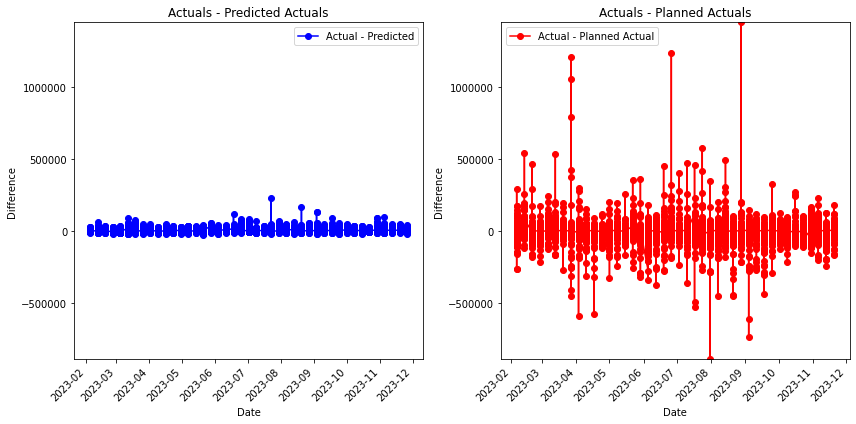

In [111]:
import matplotlib.pyplot as plt

# Plot the differences
plt.figure(figsize=(12, 6))

# Plot for Predicted Actuals - Actuals
plt.subplot(1, 2, 1)
plt.plot(result_df['Date'], result_df['Predicted_Difference'], label='Actual - Predicted', marker='o', color='blue')
plt.title('Actuals - Predicted Actuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.ticklabel_format(axis='y', style='plain')

# Plot for Planned Actuals - Actuals
plt.subplot(1, 2, 2)
plt.plot(selected_rows['Date'], selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd'],
         label='Actual - Planned Actual', marker='o', color='red')
plt.title('Actuals - Planned Actuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.legend()

# Set y-axis limits to be the same for both subplots
min_y = min(result_df['Predicted_Difference'].min(),
            (selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']).min())
max_y = max(result_df['Predicted_Difference'].max(),
            (selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']).max())

plt.subplot(1, 2, 1)
plt.ylim(min_y, max_y)

plt.subplot(1, 2, 2)
plt.ylim(min_y, max_y)

# Adjust y-axis formatting to show full numbers
plt.ticklabel_format(axis='y', style='plain')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


No handles with labels found to put in legend.
No handles with labels found to put in legend.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


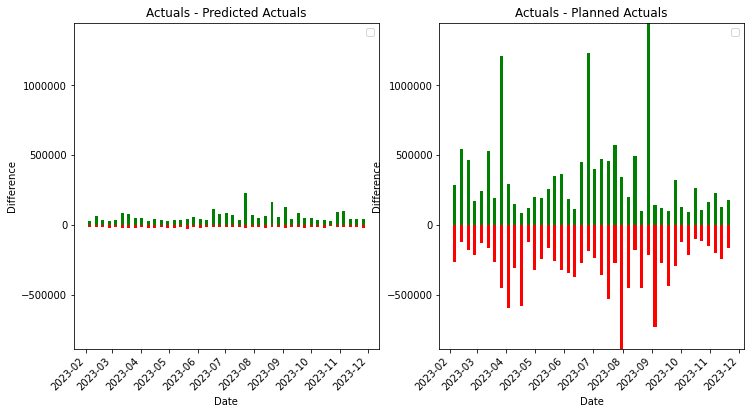

In [112]:
import matplotlib.pyplot as plt

# Plot the differences
plt.figure(figsize=(12, 6))

# Plot for Predicted Actuals - Actuals
plt.subplot(1, 2, 1)
predicted_difference = result_df['Predicted_Difference']

plt.bar(result_df['Date'], predicted_difference, color=np.where(predicted_difference > 0, 'green', 'red'), align='center', width=3.2)

plt.title('Actuals - Predicted Actuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.ticklabel_format(axis='y', style='plain')

# Plot for Planned Actuals - Actuals
plt.subplot(1, 2, 2)
planned_actual_difference = selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']

plt.bar(selected_rows['Date'], planned_actual_difference, color=np.where(planned_actual_difference > 0, 'green', 'red'), align='center', width=3.2)

plt.title('Actuals - Planned Actuals')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.legend()

# Set y-axis limits to be the same for both subplots
min_y = min(result_df['Predicted_Difference'].min(),
            (selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']).min())
max_y = max(result_df['Predicted_Difference'].max(),
            (selected_rows['Actl Ship Usd'] - selected_rows['Pln Ship Usd']).max())

plt.subplot(1, 2, 1)
plt.ylim(min_y, max_y)

plt.subplot(1, 2, 2)
plt.ylim(min_y, max_y)

# Adjust y-axis formatting to show full numbers
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(axis='y', style='plain')